<a href="https://colab.research.google.com/github/Gyracat/Fantasy-Premier-League/blob/master/%5BDSE_3_G3_1%5D_DataAnalysis(Ro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.google.com/spreadsheets/d/1L_aroM63A-07nKPJnj8Dz84QsmbGj6n7jnLy8-hv3Io/edit?usp=sharing


In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
sheet_id = '1L_aroM63A-07nKPJnj8Dz84QsmbGj6n7jnLy8-hv3Io'

df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?&format=csv')

n_row, n_column = df.shape
main_column = df.columns
df_original = df.copy()

In [ ]:
main_column

Index(['หมายเลขคำสั่งซื้อ', 'สถานะการสั่งซื้อ', 'เหตุผลในการยกเลิกคำสั่งซื้อ',
       'สถานะการคืนเงินหรือคืนสินค้า', 'ชื่อผู้ใช้ (ผู้ซื้อ)',
       'วันที่ทำการสั่งซื้อ', 'เวลาการชำระสินค้า', 'ช่องทางการชำระเงิน',
       'ตัวเลือกการจัดส่ง', 'วิธีการจัดส่ง', '*หมายเลขติดตามพัสดุ',
       'วันที่คาดว่าจะทำการจัดส่งสินค้า', 'เวลาส่งสินค้า',
       'เลขอ้างอิง Parent SKU', 'ชื่อสินค้า',
       'เลขอ้างอิง SKU (SKU Reference No.)', 'ชื่อตัวเลือก', 'ราคาตั้งต้น',
       'ราคาขาย', 'จำนวน', 'ราคาขายสุทธิ', 'ส่วนลดจาก Shopee',
       'โค้ดส่วนลดชำระโดยผู้ขาย', 'โค้ด Coins Cashback',
       'โค้ดส่วนลดชำระโดย Shopee', 'โค้ดส่วนลด',
       'เข้าร่วมแคมเปญ bundle deal หรือไม่',
       'ส่วนลด bundle deal ชำระโดยผู้ขาย', 'ส่วนลด bundle deal ชำระโดย Shopee',
       'ส่วนลดจากการใช้เหรียญ', 'ส่วนลดทั้งหมดจากบัตรเครดิต', 'ค่าคอมมิชชั่น',
       'ค่าธุรกรรมการชำระเงิน', 'ต้นทุนขาย', 'ค่าจัดส่งที่ชำระโดยผู้ซื้อ',
       'ค่าบริการ', 'จำนวนเงินทั้งหมด', 'ค่าจัดส่งโดยประมาณ', 'ชื่อผู้รับ',
       'หมาย

# Overview Data

In [ ]:
df_original

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,สถานะการคืนเงินหรือคืนสินค้า,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,วิธีการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,ชื่อสินค้า,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,ส่วนลดจาก Shopee,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ด Coins Cashback,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลด bundle deal ชำระโดย Shopee,ส่วนลดจากการใช้เหรียญ,ส่วนลดทั้งหมดจากบัตรเครดิต,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,ชื่อผู้รับ,หมายเลขโทรศัพท์,ที่อยู่ในการจัดส่ง,ประเทศ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,ประเภทคำสั่งซื้อ,เวลาที่ทำการสั่งซื้อสำเร็จ,บันทึก
0,210328HVKC185M,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 14:13,2021-03-28 14:14,SPayLater,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA49767796330,2021-03-30 14:14,2021-03-29 15:42,TRI-ULANZI-ST-02S,NaN,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,0.0,0.0,FSV-71749088,N,0.0,0.0,1800,0.0,8.0,5.0,269.0,0.0,13.0,251.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,NaN,2021-03-31 07:37,NaN
1,210328JDXVHKYJ,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่...,NaN,NaN,2021-03-28 19:24,-,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,NaN,TRI-ULANZU-ST-17,NaN,TRI-ULANZU-ST-17,NaN,499.0,175.0,1,175.0,0.0,0.0,0.0,0.0,NaN,N,0.0,0.0,0,0.0,5.0,4.0,175.0,29.0,9.0,204.0,29.0,NaN,NaN,NaN,TH,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN,NaN,NaN
2,210328JMTE8HY1,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 21:27,2021-03-28 21:27,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA19834845796,2021-03-30 21:27,2021-03-29 15:42,ACA-ULANZI-G9-4,NaN,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,0.0,0.0,FSV-71752430,N,0.0,0.0,6800,0.0,8.0,4.0,269.0,0.0,13.0,201.0,29.0,NaN,NaN,NaN,TH,จังหวัดพัทลุง,อำเภอศรีบรรพต,93190,NaN,2021-04-09 13:55,NaN
3,210329JUF48TWU,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 23:26,2021-03-28 23:26,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA08829833067,2021-03-30 23:26,2021-03-29 15:42,TRI-ULANZI-ST-02S,NaN,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,0.0,0.0,NaN,N,0.0,0.0,0,0.0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,NaN,2021-04-14 07:19,NaN
4,210329JWG8CNJR,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-29 00:02,2021-03-29 00:02,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA70991782970,2021-03-31 00:02,2021-03-29 15:42,LED-ULANZI-VL49,NaN,LED-ULANZI-VL49,NaN,890.0,341.5,2,683.0,0.0,10.0,0.0,0.0,ULAN33;GXVXMENN,Y,15.0,0.0,0,0.0,20.0,14.0,683.0,22.0,34.0,695.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตบางกอกน้อย,10700,NaN,2021-04-02 11:22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2104275VB2K197,ที่ต้องจัดส่ง,NaN,NaN,NaN,2021-04-27 12:57,2021-04-27 12:58,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,pickup,NaN,2021-04-29 12:58,NaN,LED-ULANZI-VL-66,NaN,LED-ULANZI-VL-66,NaN,990.0,482.0,1,482.0,0.0,50.0,0.0,0.0,SFP-71904314,N,0.0,0.0,6700,0.0,54.0,35.0,1863.0,22.0,91.0,1768.0,22.0,NaN,NaN,NaN,TH,จังหวัดสมุทรปราการ,อำเภอบางพลี,10540,NaN,NaN,NaN
402,2104275W9K659T,ที่ต้องจัดส่ง,NaN,NaN,NaN,2021-04-27 13:14,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,pickup,NaN,2021-04-29 13:14,NaN,LED-ULANZI-VL-49RGB,NaN,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,0.0,0.0,NaN,N,0.0,0.0,400,0.0,25.0,17.0,825.0,38.0,41.0,859.0,38.0,NaN,NaN,NaN,TH,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN,NaN,NaN
403,2104275W9K659T,ที่ต้องจัดส่ง,NaN,NaN,NaN,2021-04-27 13:14,202

# Drop Data at Repeated Sales ID

In [ ]:
df.drop_duplicates(subset=['หมายเลขคำสั่งซื้อ'], inplace=True)
df

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,สถานะการคืนเงินหรือคืนสินค้า,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,วิธีการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,ชื่อสินค้า,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,ส่วนลดจาก Shopee,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ด Coins Cashback,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลด bundle deal ชำระโดย Shopee,ส่วนลดจากการใช้เหรียญ,ส่วนลดทั้งหมดจากบัตรเครดิต,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,ชื่อผู้รับ,หมายเลขโทรศัพท์,ที่อยู่ในการจัดส่ง,ประเทศ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,ประเภทคำสั่งซื้อ,เวลาที่ทำการสั่งซื้อสำเร็จ,บันทึก
0,210328HVKC185M,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 14:13,2021-03-28 14:14,SPayLater,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA49767796330,2021-03-30 14:14,2021-03-29 15:42,TRI-ULANZI-ST-02S,NaN,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,0.0,0.0,FSV-71749088,N,0.0,0.0,1800,0.0,8.0,5.0,269.0,0.0,13.0,251.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,NaN,2021-03-31 07:37,NaN
1,210328JDXVHKYJ,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่...,NaN,NaN,2021-03-28 19:24,-,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,NaN,TRI-ULANZU-ST-17,NaN,TRI-ULANZU-ST-17,NaN,499.0,175.0,1,175.0,0.0,0.0,0.0,0.0,NaN,N,0.0,0.0,0,0.0,5.0,4.0,175.0,29.0,9.0,204.0,29.0,NaN,NaN,NaN,TH,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN,NaN,NaN
2,210328JMTE8HY1,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 21:27,2021-03-28 21:27,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA19834845796,2021-03-30 21:27,2021-03-29 15:42,ACA-ULANZI-G9-4,NaN,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,0.0,0.0,FSV-71752430,N,0.0,0.0,6800,0.0,8.0,4.0,269.0,0.0,13.0,201.0,29.0,NaN,NaN,NaN,TH,จังหวัดพัทลุง,อำเภอศรีบรรพต,93190,NaN,2021-04-09 13:55,NaN
3,210329JUF48TWU,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 23:26,2021-03-28 23:26,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA08829833067,2021-03-30 23:26,2021-03-29 15:42,TRI-ULANZI-ST-02S,NaN,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,0.0,0.0,NaN,N,0.0,0.0,0,0.0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,NaN,2021-04-14 07:19,NaN
4,210329JWG8CNJR,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-29 00:02,2021-03-29 00:02,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA70991782970,2021-03-31 00:02,2021-03-29 15:42,LED-ULANZI-VL49,NaN,LED-ULANZI-VL49,NaN,890.0,341.5,2,683.0,0.0,10.0,0.0,0.0,ULAN33;GXVXMENN,Y,15.0,0.0,0,0.0,20.0,14.0,683.0,22.0,34.0,695.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตบางกอกน้อย,10700,NaN,2021-04-02 11:22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2104275R43GK51,ที่ต้องจัดส่ง,NaN,NaN,NaN,2021-04-27 11:41,2021-04-27 11:55,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,NaN,2021-04-29 11:55,NaN,TRI-ULANZIUGRIPPRO3,NaN,TRI-ULANZIUGRIPPRO3,NaN,899.0,300.0,1,300.0,0.0,50.0,0.0,0.0,SFP-71904314;FSV-74393787,N,0.0,0.0,0,0.0,91.0,61.0,3082.0,15.0,152.0,3047.0,55.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,NaN,NaN,NaN
399,2104275UU4KB5Y,ที่ต้องจัดส่ง,NaN,NaN,NaN,2021-04-27 12:48,2021-04-27 12:48,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,pickup,NaN,2021-04-29 12:48,NaN,LED-ULANZI-VL-49RGB,NaN,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,0.0,0.0,FSV-76938081,N,0.0,0.0,0,0.0,12.0,8.0,396.0,9.0,20.0,405.0,29.0,NaN,NaN,NaN,TH,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN,NaN,NaN
400,2104275VB2K197,ที่ต้องจัดส่ง,NaN,NaN,NaN

In [ ]:
repeatedSales = df_original.shape[0] - df.shape[0]
repeatedSales

117

# Drop Column at distribution is zero

In [ ]:
nan_column = []

for key in main_column:
  series = df_original[key].value_counts()
  if series.size == 1 or series.size == 0:
    nan_column.append(key)

In [ ]:
df.drop(nan_column, inplace=True, axis=1)

In [ ]:
df

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลดจากการใช้เหรียญ,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,เวลาที่ทำการสั่งซื้อสำเร็จ
0,210328HVKC185M,สำเร็จแล้ว,NaN,2021-03-28 14:13,2021-03-28 14:14,SPayLater,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA49767796330,2021-03-30 14:14,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,FSV-71749088,N,0.0,1800,8.0,5.0,269.0,0.0,13.0,251.0,22.0,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,2021-03-31 07:37
1,210328JDXVHKYJ,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่...,2021-03-28 19:24,-,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,175.0,1,175.0,0.0,0.0,NaN,N,0.0,0,5.0,4.0,175.0,29.0,9.0,204.0,29.0,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN
2,210328JMTE8HY1,สำเร็จแล้ว,NaN,2021-03-28 21:27,2021-03-28 21:27,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA19834845796,2021-03-30 21:27,2021-03-29 15:42,ACA-ULANZI-G9-4,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,FSV-71752430,N,0.0,6800,8.0,4.0,269.0,0.0,13.0,201.0,29.0,จังหวัดพัทลุง,อำเภอศรีบรรพต,93190,2021-04-09 13:55
3,210329JUF48TWU,สำเร็จแล้ว,NaN,2021-03-28 23:26,2021-03-28 23:26,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA08829833067,2021-03-30 23:26,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,NaN,N,0.0,0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,2021-04-14 07:19
4,210329JWG8CNJR,สำเร็จแล้ว,NaN,2021-03-29 00:02,2021-03-29 00:02,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA70991782970,2021-03-31 00:02,2021-03-29 15:42,LED-ULANZI-VL49,LED-ULANZI-VL49,NaN,890.0,341.5,2,683.0,10.0,0.0,ULAN33;GXVXMENN,Y,15.0,0,20.0,14.0,683.0,22.0,34.0,695.0,22.0,จังหวัดกรุงเทพมหานคร,เขตบางกอกน้อย,10700,2021-04-02 11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2104275R43GK51,ที่ต้องจัดส่ง,NaN,2021-04-27 11:41,2021-04-27 11:55,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,NaN,2021-04-29 11:55,NaN,TRI-ULANZIUGRIPPRO3,TRI-ULANZIUGRIPPRO3,NaN,899.0,300.0,1,300.0,50.0,0.0,SFP-71904314;FSV-74393787,N,0.0,0,91.0,61.0,3082.0,15.0,152.0,3047.0,55.0,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,NaN
399,2104275UU4KB5Y,ที่ต้องจัดส่ง,NaN,2021-04-27 12:48,2021-04-27 12:48,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 12:48,NaN,LED-ULANZI-VL-49RGB,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,FSV-76938081,N,0.0,0,12.0,8.0,396.0,9.0,20.0,405.0,29.0,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN
400,2104275VB2K197,ที่ต้องจัดส่ง,NaN,2021-04-27 12:57,2021-04-27 12:58,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 12:58,NaN,NaN,TRI-ULANZI-UVLOG-ST23,U-Vlog Lite + ST-23,3339.0,1381.0,1,1381.0,50.0,0.0,SFP-71904314,N,0.0,6700,54.0,35.0,1863.0,22.0,91.0,1768.0,22.0,จังหวัดสมุทรปราการ,อำเภอบางพลี,10540,NaN
402,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,LED-ULANZI-VL-49RGB,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN


# Distribution of Value

## สถานะการสั่งซื้อ / Order Status

In [ ]:
data = df['สถานะการสั่งซื้อ'].value_counts()

dist_orderStatus = {}

for channel in data.keys():
  dist_orderStatus[channel] = data[channel]

In [ ]:
dist_orderStatus

{'การจัดส่ง': 83, 'ที่ต้องจัดส่ง': 31, 'ยกเลิกแล้ว': 48, 'สำเร็จแล้ว': 244}

([<matplotlib.patches.Wedge at 0x7fa948681810>,
 [Text(-1.0451050460497575, -0.34315512923652236, 'สำเร็จแล้ว'),
  Text(1.0527886902210375, -0.31880397385018994, 'การจัดส่ง'),
  Text(0.8272575330978348, 0.7250137749952652, 'ยกเลิกแล้ว'),
  Text(0.26133955865121367, 1.0685043917008432, 'ที่ต้องจัดส่ง')],
 [Text(-0.5700572978453222, -0.18717552503810309, '60.1%'),
  Text(0.5742483764842022, -0.17389307664555811, '20.4%'),
  Text(0.451231381689728, 0.39546205908832643, '11.8%'),
  Text(0.14254885017338925, 0.5828205772913689, '7.6%')])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3655 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3592 missing from current font.
  font.set_text(s

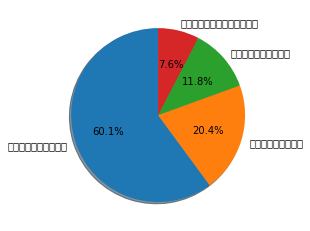

In [ ]:
fig, ax = plt.subplots()

ax.pie(dist_orderStatus.values(), labels=dist_orderStatus.keys(), autopct='%1.1f%%', 
            shadow=True, startangle=90)

## ช่วงเวลาที่ซื้อสินค้า / Sales Time

In [ ]:
def convertTime(text):
  x = text.split(' ')
  x_1 = x[0].split('-')
  x_2 = x[1].split(':')

  date = {'year': int(x_1[0]), 
              'month': int(x_1[1]), 
              'day': int(x_1[2]), 
              'hour': int(x_2[0]), 
              'minute': int(x_2[1])}
  return date

In [ ]:
a = df['เวลาการชำระสินค้า'][0]

date_1 = convertTime(a)
date_1

{'day': 28, 'hour': 14, 'minute': 14, 'month': 3, 'year': 2021}

In [ ]:
new_value = []
for i in range(n_row):
  test_1 = convertTime(df['วันที่ทำการสั่งซื้อ'][i])
  if test_1

new_value

## ระยะเวลาการชำระสินค้า / Time Payment

In [ ]:
x_1 = datetime.datetime(2021, 5, 17, 14, 13)
x_2 = datetime.datetime(2022, 6, 18, 15, 16)

In [ ]:
a = x_2 - x_1
a.days

397

In [ ]:
def differentTime(start_date, stop_date):
  t_1 = datetime.datetime(start_date['year'], 
                                      start_date['month'], 
                                      start_date['day'], 
                                      start_date['hour'], 
                                      start_date['minute'])
  t_2 = datetime.datetime(stop_date['year'], 
                                      stop_date['month'], 
                                      stop_date['day'], 
                                      stop_date['hour'], 
                                      stop_date['minute'])
  different = t_2 - t_1
  return different.days

In [ ]:
test_1 = convertTime(df['วันที่ทำการสั่งซื้อ'][0])
test_2 = convertTime(df['เวลาการชำระสินค้า'][0])

differentTime(test_1, test_2)

0

In [ ]:
n_row

406

In [ ]:
new_value = []
for i in range(n_row):
  if df['เวลาการชำระสินค้า'][i] != '-':
    test_1 = convertTime(df['วันที่ทำการสั่งซื้อ'][i])
    test_2 = convertTime(df['เวลาการชำระสินค้า'][i])

    different = differentTime(test_1, test_2)
    new_value.append(different)
  else:
    new_value.append('-')

new_value

[0,
 '-',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '-',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '-',
 '-',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '-',
 0,
 0,
 0,
 0,
 '-',
 0,
 0,
 0,
 0,
 '-',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '-',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '-',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [ ]:
new_index = list(df.columns).index('เวลาการชำระสินค้า')
df.insert(new_index+1, 'ระยะเวลาการชำระสินค้า', new_value, True)

In [ ]:
df

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ระยะเวลาการชำระสินค้า,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลดจากการใช้เหรียญ,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,เวลาที่ทำการสั่งซื้อสำเร็จ
0,210328HVKC185M,สำเร็จแล้ว,NaN,2021-03-28 14:13,2021-03-28 14:14,0,SPayLater,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA49767796330,2021-03-30 14:14,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,FSV-71749088,N,0.0,1800,8.0,5.0,269.0,0.0,13.0,251.0,22.0,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,2021-03-31 07:37
1,210328JDXVHKYJ,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่...,2021-03-28 19:24,-,-,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,175.0,1,175.0,0.0,0.0,NaN,N,0.0,0,5.0,4.0,175.0,29.0,9.0,204.0,29.0,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN
2,210328JMTE8HY1,สำเร็จแล้ว,NaN,2021-03-28 21:27,2021-03-28 21:27,0,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA19834845796,2021-03-30 21:27,2021-03-29 15:42,ACA-ULANZI-G9-4,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,FSV-71752430,N,0.0,6800,8.0,4.0,269.0,0.0,13.0,201.0,29.0,จังหวัดพัทลุง,อำเภอศรีบรรพต,93190,2021-04-09 13:55
3,210329JUF48TWU,สำเร็จแล้ว,NaN,2021-03-28 23:26,2021-03-28 23:26,0,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA08829833067,2021-03-30 23:26,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,NaN,N,0.0,0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,2021-04-14 07:19
4,210329JWG8CNJR,สำเร็จแล้ว,NaN,2021-03-29 00:02,2021-03-29 00:02,0,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA70991782970,2021-03-31 00:02,2021-03-29 15:42,LED-ULANZI-VL49,LED-ULANZI-VL49,NaN,890.0,341.5,2,683.0,10.0,0.0,ULAN33;GXVXMENN,Y,15.0,0,20.0,14.0,683.0,22.0,34.0,695.0,22.0,จังหวัดกรุงเทพมหานคร,เขตบางกอกน้อย,10700,2021-04-02 11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2104275VB2K197,ที่ต้องจัดส่ง,NaN,2021-04-27 12:57,2021-04-27 12:58,0,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 12:58,NaN,LED-ULANZI-VL-66,LED-ULANZI-VL-66,NaN,990.0,482.0,1,482.0,50.0,0.0,SFP-71904314,N,0.0,6700,54.0,35.0,1863.0,22.0,91.0,1768.0,22.0,จังหวัดสมุทรปราการ,อำเภอบางพลี,10540,NaN
402,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,2021-04-27 13:14,0,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,LED-ULANZI-VL-49RGB,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN
403,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,2021-04-27 13:14,0,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,TRI-ULANZI-MT-08-WH,TRI-ULANZI-MT-08-WH,NaN,650.0,268.0,1,268.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN
404,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,2021-04-27 13:14,0,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,161.0,1,161.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN


In [ ]:
df['ระยะเวลาการชำระสินค้า'].value_counts()

0    375
-     31
Name: ระยะเวลาการชำระสินค้า, dtype: int64

In [ ]:
df.drop(['เวลาการชำระสินค้า', 'ระยะเวลาการชำระสินค้า'], inplace=True, axis=1)

In [ ]:
df

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,วันที่ทำการสั่งซื้อ,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลดจากการใช้เหรียญ,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,เวลาที่ทำการสั่งซื้อสำเร็จ
0,210328HVKC185M,สำเร็จแล้ว,NaN,2021-03-28 14:13,SPayLater,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA49767796330,2021-03-30 14:14,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,FSV-71749088,N,0.0,1800,8.0,5.0,269.0,0.0,13.0,251.0,22.0,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,2021-03-31 07:37
1,210328JDXVHKYJ,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่...,2021-03-28 19:24,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,175.0,1,175.0,0.0,0.0,NaN,N,0.0,0,5.0,4.0,175.0,29.0,9.0,204.0,29.0,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN
2,210328JMTE8HY1,สำเร็จแล้ว,NaN,2021-03-28 21:27,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA19834845796,2021-03-30 21:27,2021-03-29 15:42,ACA-ULANZI-G9-4,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,FSV-71752430,N,0.0,6800,8.0,4.0,269.0,0.0,13.0,201.0,29.0,จังหวัดพัทลุง,อำเภอศรีบรรพต,93190,2021-04-09 13:55
3,210329JUF48TWU,สำเร็จแล้ว,NaN,2021-03-28 23:26,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA08829833067,2021-03-30 23:26,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,NaN,N,0.0,0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,2021-04-14 07:19
4,210329JWG8CNJR,สำเร็จแล้ว,NaN,2021-03-29 00:02,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA70991782970,2021-03-31 00:02,2021-03-29 15:42,LED-ULANZI-VL49,LED-ULANZI-VL49,NaN,890.0,341.5,2,683.0,10.0,0.0,ULAN33;GXVXMENN,Y,15.0,0,20.0,14.0,683.0,22.0,34.0,695.0,22.0,จังหวัดกรุงเทพมหานคร,เขตบางกอกน้อย,10700,2021-04-02 11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2104275VB2K197,ที่ต้องจัดส่ง,NaN,2021-04-27 12:57,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 12:58,NaN,LED-ULANZI-VL-66,LED-ULANZI-VL-66,NaN,990.0,482.0,1,482.0,50.0,0.0,SFP-71904314,N,0.0,6700,54.0,35.0,1863.0,22.0,91.0,1768.0,22.0,จังหวัดสมุทรปราการ,อำเภอบางพลี,10540,NaN
402,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,LED-ULANZI-VL-49RGB,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN
403,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,TRI-ULANZI-MT-08-WH,TRI-ULANZI-MT-08-WH,NaN,650.0,268.0,1,268.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN
404,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,161.0,1,161.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN


## ช่องทางการชำระเงิน / Payment Channel

In [ ]:
data = df['ช่องทางการชำระเงิน'].value_counts()

dist_paymentChannel = {}

for channel in data.keys():
  dist_paymentChannel[channel] = data[channel]

In [ ]:
dist_paymentChannel

{'Online Payment': 51,
 'SPayLater': 12,
 'ShopeePay - ตัดบัญชีธนาคาร': 62,
 'ShopeePay - ยอดเงินใน Wallet': 28,
 'บัตรเครดิต/บัตรเดบิต': 129,
 'เก็บเงินปลายทาง': 95,
 'โอน/ชำระผ่านช่องทางธนาคาร': 29}

## ตัวเลือกการจัดส่ง / Delivery Choice

In [ ]:
data = df['ตัวเลือกการจัดส่ง'].value_counts()

dist_deliveryChoice = {}

for channel in data.keys():
  dist_deliveryChoice[channel] = data[channel]

In [ ]:
dist_deliveryChoice

{'Buyer Self-Collect ผู้ซื้อไปรับสินค้าเอง': 14,
 'Standard Delivery - ส่งธรรมดาในประเทศ': 42,
 'Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Domestic': 247,
 'Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Express': 103}

## โค๊ดส่วนลด / Discount code

In [ ]:
data = df['โค้ดส่วนลด'].value_counts()

dist_discountCode = {}

for channel in data.keys():
  dist_discountCode[channel] = data[channel]


In [ ]:
dist_discountCode

{'0V1TOKTZ': 2,
 '15OFFMALL': 1,
 '44LASTCHANCE': 2,
 '44MALL': 1,
 '9G4HK6MEFX': 1,
 'APR15CCB': 1,
 'APR15OFFN': 2,
 'CRM02EAR': 1,
 'DDFULL50APR': 5,
 'EPC23CRM': 1,
 'FP64FD4P': 3,
 'FSV-71749088': 2,
 'FSV-71752430': 3,
 'FSV-74392650': 1,
 'FSV-74395039': 2,
 'FSV-74714798': 10,
 'FSV-74714799': 9,
 'FSV-74714801': 7,
 'FSV-74714804': 1,
 'FSV-74714805': 2,
 'FSV-74714808': 4,
 'FSV-74714809': 1,
 'FSV-74823237': 1,
 'FSV-74823270': 1,
 'FSV-74823288': 1,
 'FSV-74826743': 1,
 'FSV-74826856': 2,
 'FSV-74826887': 1,
 'FSV-74826905': 1,
 'FSV-74832213': 1,
 'FSV-74940732': 3,
 'FSV-74984221': 1,
 'FSV-75087185': 1,
 'FSV-75110135': 1,
 'FSV-75863563': 1,
 'FSV-76937736': 3,
 'FSV-76938081': 5,
 'HIAPR100': 1,
 'I64E48MH': 2,
 'MALL25CRM': 1,
 'NUZDISCB': 1,
 'NUZDISCD': 1,
 'PIMCHA555': 1,
 'SB12YKAWGG': 1,
 'SFP-71904314': 4,
 'SFP-71904314;FSV-74393787': 1,
 'SFP-71904314;FSV-74714805': 1,
 'SFP-71904314;FSV-74714808': 1,
 'SFP-71904314;SPCCB79HFB': 1,
 'SFP-71904314;SPCCBJKN52': 

In [ ]:
n = 0
for i in dist_discountCode.values():
  n += i

n

128

In [ ]:
n_row

406

## จังหวัด / Province

In [ ]:
data = df['จังหวัด'].value_counts()

dist_province = {}

for channel in data.keys():
  dist_province[channel] = data[channel]

In [ ]:
dist_province

{'จังหวัดกรุงเทพมหานคร': 182,
 'จังหวัดกาญจนบุรี': 3,
 'จังหวัดขอนแก่น': 10,
 'จังหวัดจันทบุรี': 3,
 'จังหวัดฉะเชิงเทรา': 1,
 'จังหวัดชลบุรี': 22,
 'จังหวัดตรัง': 2,
 'จังหวัดนครปฐม': 2,
 'จังหวัดนครพนม': 3,
 'จังหวัดนครราชสีมา': 3,
 'จังหวัดนครศรีธรรมราช': 1,
 'จังหวัดนครสวรรค์': 11,
 'จังหวัดนนทบุรี': 28,
 'จังหวัดนราธิวาส': 1,
 'จังหวัดบุรีรัมย์': 2,
 'จังหวัดปทุมธานี': 16,
 'จังหวัดประจวบคีรีขันธ์': 4,
 'จังหวัดปัตตานี': 1,
 'จังหวัดพระนครศรีอยุธยา': 4,
 'จังหวัดพะเยา': 1,
 'จังหวัดพัทลุง': 6,
 'จังหวัดพิจิตร': 1,
 'จังหวัดภูเก็ต': 6,
 'จังหวัดมหาสารคาม': 2,
 'จังหวัดราชบุรี': 2,
 'จังหวัดลพบุรี': 2,
 'จังหวัดลำปาง': 4,
 'จังหวัดลำพูน': 3,
 'จังหวัดศรีสะเกษ': 6,
 'จังหวัดสกลนคร': 2,
 'จังหวัดสงขลา': 5,
 'จังหวัดสตูล': 3,
 'จังหวัดสมุทรปราการ': 19,
 'จังหวัดสมุทรสาคร': 14,
 'จังหวัดสระบุรี': 2,
 'จังหวัดสุราษฎร์ธานี': 3,
 'จังหวัดสุรินทร์': 1,
 'จังหวัดหนองคาย': 2,
 'จังหวัดอุตรดิตถ์': 1,
 'จังหวัดอุบลราชธานี': 6,
 'จังหวัดเชียงราย': 3,
 'จังหวัดเชียงใหม่': 10,
 'จังหวัดเพชรบุรี': 3

In [ ]:
data = df.loc[(df['จังหวัด'] == 'จังหวัดกรุงเทพมหานคร'), 'เขต/อำเภอ'].value_counts()

dist_Bangkok_District = {}

for channel in data.keys():
  dist_Bangkok_District[channel] = data[channel]

In [ ]:
dist_Bangkok_District

{'เขตคลองสาน': 6,
 'เขตคลองสามวา': 1,
 'เขตคลองเตย': 2,
 'เขตคันนายาว': 5,
 'เขตจตุจักร': 16,
 'เขตจอมทอง': 1,
 'เขตดอนเมือง': 8,
 'เขตดินแดง': 3,
 'เขตตลิ่งชัน': 1,
 'เขตทวีวัฒนา': 1,
 'เขตธนบุรี': 2,
 'เขตบางกอกน้อย': 5,
 'เขตบางกะปิ': 7,
 'เขตบางขุนเทียน': 15,
 'เขตบางคอแหลม': 1,
 'เขตบางซื่อ': 4,
 'เขตบางนา': 2,
 'เขตบางบอน': 1,
 'เขตบางรัก': 2,
 'เขตบางเขน': 4,
 'เขตบางแค': 3,
 'เขตบึงกุ่ม': 2,
 'เขตปทุมวัน': 5,
 'เขตประเวศ': 1,
 'เขตพญาไท': 2,
 'เขตพระนคร': 2,
 'เขตพระโขนง': 3,
 'เขตภาษีเจริญ': 4,
 'เขตมีนบุรี': 3,
 'เขตยานนาวา': 18,
 'เขตราษฎร์บูรณะ': 5,
 'เขตลาดกระบัง': 3,
 'เขตลาดพร้าว': 8,
 'เขตวังทองหลาง': 2,
 'เขตวัฒนา': 5,
 'เขตสวนหลวง': 3,
 'เขตสะพานสูง': 4,
 'เขตสัมพันธวงศ์': 2,
 'เขตสาทร': 1,
 'เขตสายไหม': 8,
 'เขตหลักสี่': 3,
 'เขตห้วยขวาง': 8}

In [ ]:
df

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,วันที่ทำการสั่งซื้อ,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลดจากการใช้เหรียญ,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,เวลาที่ทำการสั่งซื้อสำเร็จ
0,210328HVKC185M,สำเร็จแล้ว,NaN,2021-03-28 14:13,SPayLater,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA49767796330,2021-03-30 14:14,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,FSV-71749088,N,0.0,1800,8.0,5.0,269.0,0.0,13.0,251.0,22.0,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,2021-03-31 07:37
1,210328JDXVHKYJ,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่...,2021-03-28 19:24,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,175.0,1,175.0,0.0,0.0,NaN,N,0.0,0,5.0,4.0,175.0,29.0,9.0,204.0,29.0,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN
2,210328JMTE8HY1,สำเร็จแล้ว,NaN,2021-03-28 21:27,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA19834845796,2021-03-30 21:27,2021-03-29 15:42,ACA-ULANZI-G9-4,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,FSV-71752430,N,0.0,6800,8.0,4.0,269.0,0.0,13.0,201.0,29.0,จังหวัดพัทลุง,อำเภอศรีบรรพต,93190,2021-04-09 13:55
3,210329JUF48TWU,สำเร็จแล้ว,NaN,2021-03-28 23:26,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA08829833067,2021-03-30 23:26,2021-03-29 15:42,TRI-ULANZI-ST-02S,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,NaN,N,0.0,0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,2021-04-14 07:19
4,210329JWG8CNJR,สำเร็จแล้ว,NaN,2021-03-29 00:02,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,THBCA70991782970,2021-03-31 00:02,2021-03-29 15:42,LED-ULANZI-VL49,LED-ULANZI-VL49,NaN,890.0,341.5,2,683.0,10.0,0.0,ULAN33;GXVXMENN,Y,15.0,0,20.0,14.0,683.0,22.0,34.0,695.0,22.0,จังหวัดกรุงเทพมหานคร,เขตบางกอกน้อย,10700,2021-04-02 11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2104275VB2K197,ที่ต้องจัดส่ง,NaN,2021-04-27 12:57,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 12:58,NaN,LED-ULANZI-VL-66,LED-ULANZI-VL-66,NaN,990.0,482.0,1,482.0,50.0,0.0,SFP-71904314,N,0.0,6700,54.0,35.0,1863.0,22.0,91.0,1768.0,22.0,จังหวัดสมุทรปราการ,อำเภอบางพลี,10540,NaN
402,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,LED-ULANZI-VL-49RGB,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN
403,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,TRI-ULANZI-MT-08-WH,TRI-ULANZI-MT-08-WH,NaN,650.0,268.0,1,268.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN
404,2104275W9K659T,ที่ต้องจัดส่ง,NaN,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,NaN,2021-04-29 13:14,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,161.0,1,161.0,0.0,0.0,NaN,N,0.0,400,25.0,17.0,825.0,38.0,41.0,859.0,38.0,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN


# เหตุผลในการยกเลิกคำสั่งซื้อ / Reason for order cancellation

In [ ]:
df_cancel = df.loc[df['สถานะการสั่งซื้อ']=='ยกเลิกแล้ว']
df_cancel

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,วันที่ทำการสั่งซื้อ,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลดจากการใช้เหรียญ,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,เวลาที่ทำการสั่งซื้อสำเร็จ
1,210328JDXVHKYJ,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่...,2021-03-28 19:24,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZU-ST-17,TRI-ULANZU-ST-17,NaN,499.0,175.0,1,175.0,0.0,0.0,NaN,N,0.0,0,5.0,4.0,175.0,29.0,9.0,204.0,29.0,จังหวัดเชียงราย,อำเภอเมืองเชียงราย,57100,NaN
9,210329M97H6TBM,ยกเลิกแล้ว,ยกเลิกโดยอัตโนมัติจากระบบของ Shopee <br>เหตุผล...,2021-03-29 13:05,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,615445942613,2021-03-31 13:35,2021-03-30 17:15,TRI-ULANZI-MT-14,TRI-ULANZI-MT-14,NaN,1349.0,459.0,1,459.0,0.0,0.0,NaN,N,0.0,0,0.0,0.0,459.0,0.0,0.0,0.0,22.0,จังหวัดกรุงเทพมหานคร,เขตคันนายาว,10230,NaN
38,210401TF8ENKH7,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : อื่น ๆ หรือเปลี่ยนใจ,2021-04-01 00:09,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,2021-04-03 00:09,NaN,ACA-ULANZI-G9-4,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,NaN,N,0.0,0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,จังหวัดนนทบุรี,อำเภอเมืองนนทบุรี,11000,NaN
51,2104020RKYP69G,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : ต้องการเพิ่ม/เปลี่ยน...,2021-04-02 08:33,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,ACA-ULANZI-G9-4,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,NaN,N,0.0,0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,จังหวัดกรุงเทพมหานคร,เขตยานนาวา,10120,NaN
68,2104044W5F9RYS,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : ต้องการเพิ่ม/เปลี่ยน...,2021-04-04 00:06,ShopeePay - ยอดเงินใน Wallet,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZI-U-PAD,TRI-ULANZI-U-PAD,NaN,1490.0,599.0,1,599.0,0.0,0.0,DDFULL50APR,N,0.0,5800,18.0,11.0,599.0,22.0,30.0,563.0,22.0,จังหวัดกรุงเทพมหานคร,เขตบางแค,10160,NaN
69,2104044W83775R,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : ไม่ต้องการซื้อสินค้า...,2021-04-04 00:07,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZI-SK-02,TRI-ULANZI-SK-02,NaN,1290.0,639.0,1,639.0,0.0,105.0,UBRI0DH4,N,0.0,0,19.0,11.0,639.0,22.0,32.0,556.0,22.0,จังหวัดกรุงเทพมหานคร,เขตคลองสาน,10600,NaN
83,2104046A9A4WBF,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : อื่น ๆ,2021-04-04 13:33,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,TRI-ULANZI-MT-16,TRI-ULANZI-MT-16,NaN,959.0,499.0,1,499.0,0.0,50.0,SPPDD4450,N,0.0,0,15.0,11.0,499.0,79.0,25.0,528.0,79.0,จังหวัดสุราษฎร์ธานี,อำเภอเกาะพะงัน,84280,NaN
88,2104046KV3YWGN,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : ไม่ต้องการซื้อสินค้า...,2021-04-04 16:25,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,LED-ULANZI-VL49,LED-ULANZI-VL49,NaN,890.0,349.0,1,349.0,0.0,0.0,NaN,N,0.0,0,10.0,8.0,349.0,29.0,17.0,378.0,29.0,จังหวัดพัทลุง,อำเภอเมืองพัทลุง,93000,NaN
89,2104046MRPJ9J4,ยกเลิกแล้ว,ยกเลิกโดยผู้ซื้อ เหตุผล : อื่น ๆ หรือเปลี่ยนใจ,2021-04-04 16:41,เก็บเงินปลายทาง,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,2021-04-08 17:11,NaN,LED-ULANZI-VL49,LED-ULANZI-VL49,NaN,890.0,349.0,1,349.0,0.0,0.0,FSV-74714805,N,0.0,0,10.0,7.0,349.0,0.0,17.0,349.0,29.0,จังหวัดพัทลุง,อำเภอเมืองพัทลุง,93000,NaN
93,21040473V53UXA,ยกเลิกแล้ว,ยกเลิกโดยอัตโนมัติจากระบบของ Shopee <br>เหตุผล...,2021-04-04 21:11,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ,NaN,NaN,NaN,ACA-ULANZI-G9-4,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,39.0,44LASTCHANCE,N,0.0,0,8.0,5.0,269.0,22.0,13.0,252.0,22.0,จังหวัดกรุงเทพมหานคร,เขตดอนเมือง,10210,NaN


In [ ]:
data = df_cancel['เหตุผลในการยกเลิกคำสั่งซื้อ'].value_counts()

dist_reasonCancel = {}

for channel in data.keys():
  dist_reasonCancel[channel] = data[channel]

dist_reasonCancel

{'ยกเลิกโดยผู้ซื้อ เหตุผล : ขั้นตอนการชำระเงินซับซ้อนเกินไป': 1,
 'ยกเลิกโดยผู้ซื้อ เหตุผล : ต้องการเปลี่ยนที่อยู่ในการจัดส่ง': 1,
 'ยกเลิกโดยผู้ซื้อ เหตุผล : ต้องการเพิ่ม/เปลี่ยนโค้ดส่วนลด': 6,
 'ยกเลิกโดยผู้ซื้อ เหตุผล : ต้องการแก้ไขรายละเอียดคำสั่งซื้อ': 11,
 'ยกเลิกโดยผู้ซื้อ เหตุผล : อื่น ๆ': 1,
 'ยกเลิกโดยผู้ซื้อ เหตุผล : อื่น ๆ หรือเปลี่ยนใจ': 16,
 'ยกเลิกโดยผู้ซื้อ เหตุผล : เจอสินค้าเดียวกันที่ถูกกว่า': 2,
 'ยกเลิกโดยผู้ซื้อ เหตุผล : ไม่ต้องการซื้อสินค้านี้แล้ว': 8,
 'ยกเลิกโดยอัตโนมัติจากระบบของ Shopee <br>เหตุผล : การจัดส่งไม่สำเร็จ': 1,
 'ยกเลิกโดยอัตโนมัติจากระบบของ Shopee <br>เหตุผล : ไม่มีการชำระเงิน': 1}

## สินค้าที่ถูกยกเลิก / Product Cancelling

In [ ]:
data = df_cancel['เลขอ้างอิง Parent SKU'].value_counts()

dist_productCancelling = {}

for channel in data.keys():
  dist_productCancelling[channel] = data[channel]

dist_productCancelling

{'ACA-ULANZI-G9-4': 6,
 'ACA-UURIG-R005': 2,
 'LED-ULANZI-VL-49RGB': 3,
 'LED-ULANZI-VL49': 13,
 'LED-ULANZI-VL69': 1,
 'LED-VIJIM-VL81': 1,
 'TRI-ULANZI-M-RIG': 3,
 'TRI-ULANZI-MT-08-WH': 1,
 'TRI-ULANZI-MT-14': 1,
 'TRI-ULANZI-MT-16': 3,
 'TRI-ULANZI-MT17': 3,
 'TRI-ULANZI-SK-02': 1,
 'TRI-ULANZI-ST-02S': 4,
 'TRI-ULANZI-TABLETHOLDER': 1,
 'TRI-ULANZI-U-PAD': 1,
 'TRI-ULANZIUGRIPPRO3': 1,
 'TRI-ULANZU-ST-17': 2}

## จังหวัด / Province

In [ ]:
data = df_cancel['จังหวัด'].value_counts()

dist_cancelProvince = {}

for channel in data.keys():
  dist_cancelProvince[channel] = data[channel]

dist_cancelProvince

{'จังหวัดกรุงเทพมหานคร': 22,
 'จังหวัดชลบุรี': 1,
 'จังหวัดนครพนม': 1,
 'จังหวัดนครสวรรค์': 10,
 'จังหวัดนนทบุรี': 1,
 'จังหวัดพระนครศรีอยุธยา': 1,
 'จังหวัดพัทลุง': 4,
 'จังหวัดราชบุรี': 1,
 'จังหวัดสมุทรสาคร': 1,
 'จังหวัดสุราษฎร์ธานี': 2,
 'จังหวัดเชียงราย': 1,
 'จังหวัดเชียงใหม่': 3}

In [ ]:
data = df_cancel.loc[(df_cancel['จังหวัด'] == 'จังหวัดกรุงเทพมหานคร'), 'เขต/อำเภอ'].value_counts()

dist_cancelBangkok_District = {}

for channel in data.keys():
  dist_cancelBangkok_District[channel] = data[channel]

dist_cancelBangkok_District

{'เขตคลองสาน': 1,
 'เขตคันนายาว': 1,
 'เขตจตุจักร': 1,
 'เขตดอนเมือง': 2,
 'เขตธนบุรี': 1,
 'เขตบางขุนเทียน': 4,
 'เขตบางแค': 1,
 'เขตยานนาวา': 11}

# Top10 Best Seller

In [ ]:
df_confirm = df.loc[df['สถานะการสั่งซื้อ'] != 'ยกเลิกแล้ว']
df_confirm

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,เหตุผลในการยกเลิกคำสั่งซื้อ,สถานะการคืนเงินหรือคืนสินค้า,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ตัวเลือกการจัดส่ง,วิธีการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,เวลาส่งสินค้า,เลขอ้างอิง Parent SKU,ชื่อสินค้า,เลขอ้างอิง SKU (SKU Reference No.),ชื่อตัวเลือก,ราคาตั้งต้น,ราคาขาย,จำนวน,ราคาขายสุทธิ,ส่วนลดจาก Shopee,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ด Coins Cashback,โค้ดส่วนลดชำระโดย Shopee,โค้ดส่วนลด,เข้าร่วมแคมเปญ bundle deal หรือไม่,ส่วนลด bundle deal ชำระโดยผู้ขาย,ส่วนลด bundle deal ชำระโดย Shopee,ส่วนลดจากการใช้เหรียญ,ส่วนลดทั้งหมดจากบัตรเครดิต,ค่าคอมมิชชั่น,ค่าธุรกรรมการชำระเงิน,ต้นทุนขาย,ค่าจัดส่งที่ชำระโดยผู้ซื้อ,ค่าบริการ,จำนวนเงินทั้งหมด,ค่าจัดส่งโดยประมาณ,ชื่อผู้รับ,หมายเลขโทรศัพท์,ที่อยู่ในการจัดส่ง,ประเทศ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,ประเภทคำสั่งซื้อ,เวลาที่ทำการสั่งซื้อสำเร็จ,บันทึก
0,210328HVKC185M,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 14:13,2021-03-28 14:14,SPayLater,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA49767796330,2021-03-30 14:14,2021-03-29 15:42,TRI-ULANZI-ST-02S,NaN,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,0.0,0.0,FSV-71749088,N,0.0,0.0,1800,0.0,8.0,5.0,269.0,0.0,13.0,251.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตจตุจักร,10900,NaN,2021-03-31 07:37,NaN
2,210328JMTE8HY1,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 21:27,2021-03-28 21:27,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA19834845796,2021-03-30 21:27,2021-03-29 15:42,ACA-ULANZI-G9-4,NaN,ACA-ULANZI-G9-4,NaN,699.0,269.0,1,269.0,0.0,0.0,0.0,0.0,FSV-71752430,N,0.0,0.0,6800,0.0,8.0,4.0,269.0,0.0,13.0,201.0,29.0,NaN,NaN,NaN,TH,จังหวัดพัทลุง,อำเภอศรีบรรพต,93190,NaN,2021-04-09 13:55,NaN
3,210329JUF48TWU,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-28 23:26,2021-03-28 23:26,ShopeePay - ตัดบัญชีธนาคาร,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA08829833067,2021-03-30 23:26,2021-03-29 15:42,TRI-ULANZI-ST-02S,NaN,TRI-ULANZI-ST-02S,NaN,888.0,269.0,1,269.0,0.0,0.0,0.0,0.0,NaN,N,0.0,0.0,0,0.0,8.0,6.0,269.0,22.0,13.0,291.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตสายไหม,10220,NaN,2021-04-14 07:19,NaN
4,210329JWG8CNJR,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-29 00:02,2021-03-29 00:02,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA70991782970,2021-03-31 00:02,2021-03-29 15:42,LED-ULANZI-VL49,NaN,LED-ULANZI-VL49,NaN,890.0,341.5,2,683.0,0.0,10.0,0.0,0.0,ULAN33;GXVXMENN,Y,15.0,0.0,0,0.0,20.0,14.0,683.0,22.0,34.0,695.0,22.0,NaN,NaN,NaN,TH,จังหวัดกรุงเทพมหานคร,เขตบางกอกน้อย,10700,NaN,2021-04-02 11:22,NaN
5,210329K43A3U03,สำเร็จแล้ว,NaN,NaN,NaN,2021-03-29 02:00,2021-03-29 02:00,Online Payment,Standard Delivery - ส่งธรรมดาในประเทศ\nDHL Dom...,pickup,THBCA20941643400,2021-03-31 02:00,2021-03-29 15:42,ACA-ULANZI-G9-2,NaN,ACA-ULANZI-G9-2,NaN,790.0,279.0,1,279.0,0.0,10.0,0.0,0.0,ULAN33,N,0.0,0.0,0,0.0,20.0,14.0,678.0,22.0,33.0,690.0,22.0,NaN,NaN,NaN,TH,จังหวัดนนทบุรี,อำเภอเมืองนนทบุรี,11000,NaN,2021-04-01 20:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2104275VB2K197,ที่ต้องจัดส่ง,NaN,NaN,NaN,2021-04-27 12:57,2021-04-27 12:58,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,pickup,NaN,2021-04-29 12:58,NaN,LED-ULANZI-VL-66,NaN,LED-ULANZI-VL-66,NaN,990.0,482.0,1,482.0,0.0,50.0,0.0,0.0,SFP-71904314,N,0.0,0.0,6700,0.0,54.0,35.0,1863.0,22.0,91.0,1768.0,22.0,NaN,NaN,NaN,TH,จังหวัดสมุทรปราการ,อำเภอบางพลี,10540,NaN,NaN,NaN
402,2104275W9K659T,ที่ต้องจัดส่ง,NaN,NaN,NaN,2021-04-27 13:14,2021-04-27 13:14,บัตรเครดิต/บัตรเดบิต,Standard Delivery - ส่งธรรมดาในประเทศ\nJ&T Exp...,pickup,NaN,2021-04-29 13:14,NaN,LED-ULANZI-VL-49RGB,NaN,LED-ULANZI-VL-49RGB,NaN,1290.0,396.0,1,396.0,0.0,0.0,0.0,0.0,NaN,N,0.0,0.0,400,0.0,25.0,17.0,825.0,38.0,41.0,859.0,38.0,NaN,NaN,NaN,TH,จังหวัดเชียงใหม่,อำเภอเมืองเชียงใหม่,50200,NaN,NaN,NaN
403,2104275W9K659T,ที่ต้องจ

In [ ]:
data = df_confirm['เลขอ้างอิง Parent SKU'].value_counts()

dist_productID = {}

for channel in data.keys():
  dist_productID[channel] = data[channel]

In [ ]:
dist_productID

{'ACA-ULANZI V2 Vlog Gopro Case': 5,
 'ACA-ULANZI-G8-9': 1,
 'ACA-ULANZI-G9-1': 1,
 'ACA-ULANZI-G9-2': 5,
 'ACA-ULANZI-G9-3': 1,
 'ACA-ULANZI-G9-4': 26,
 'ACA-ULANZI-G9-5': 1,
 'ACA-ULANZI-G9-7': 5,
 'ACA-ULANZI-OP12': 2,
 'ACA-ULANZI-R002': 1,
 'ACA-ULANZI-ST-08': 2,
 'ACA-ULANZI-ST23': 1,
 'ACA-ULANZI-U150': 1,
 'ACA-ULANZIHandheldDJIOsmo': 1,
 'ACA-UURIG-R005': 1,
 'ACA-UURIG-R015': 1,
 'ACA-UURIG-R060': 2,
 'ACA-UURIG-R061': 1,
 'LED-ULANZI-VL-49RGB': 63,
 'LED-ULANZI-VL-66': 10,
 'LED-ULANZI-VL49': 41,
 'LED-ULANZI-VL69': 1,
 'LED-VIJIM-VL81': 6,
 'STU-VLOG-003': 4,
 'STU-VLOG-004': 1,
 'TRI-ULANZI-3IN1-TOP': 11,
 'TRI-ULANZI-M-RIG': 2,
 'TRI-ULANZI-MT-08': 38,
 'TRI-ULANZI-MT-08-WH': 7,
 'TRI-ULANZI-MT-11': 11,
 'TRI-ULANZI-MT-14': 3,
 'TRI-ULANZI-MT-16': 8,
 'TRI-ULANZI-MT17': 2,
 'TRI-ULANZI-SK-02': 3,
 'TRI-ULANZI-ST-01': 1,
 'TRI-ULANZI-ST-02S': 28,
 'TRI-ULANZI-ST-13': 1,
 'TRI-ULANZI-ST19': 6,
 'TRI-ULANZI-TABLETHOLDER': 2,
 'TRI-ULANZI-U-PAD': 6,
 'TRI-ULANZI-U-RIGWIRELESS

In [ ]:
def findGroup(dict_name):
  dict_productGroup = {}
  for name in dict_name.keys():
    keyword = name[0:3]
    if keyword not in dict_productGroup.keys():
      dict_productGroup[keyword] = dict_name[name]
    else:
      dict_productGroup[keyword] += dict_name[name]
  return dict_productGroup

findGroup(dist_productID)

{'ACA': 58, 'LED': 121, 'STU': 5, 'TRI': 171}

# สินค้าลดกีเปอร์เซ็นต์ / Discount Percent

In [ ]:
df_principal = df['ราคาตั้งต้น']
df_principal

0       888.0
1       499.0
2       699.0
3       888.0
4       890.0
        ...  
401     990.0
402    1290.0
403     650.0
404     499.0
405     888.0
Name: ราคาตั้งต้น, Length: 406, dtype: float64

In [ ]:
df_sellingprice = df['ราคาขาย']
df_sellingprice

0      269.0
1      175.0
2      269.0
3      269.0
4      341.5
       ...  
401    482.0
402    396.0
403    268.0
404    161.0
405    269.0
Name: ราคาขาย, Length: 406, dtype: float64

In [ ]:
new_list=[]
for i in range(n_row):
 data_discount = ((df['ราคาตั้งต้น'][i]-df['ราคาขาย'][i])/df['ราคาตั้งต้น'][i])*100
 new_list.append(data_discount)

In [ ]:
new_list

[69.7072072072072,
 64.92985971943888,
 61.51645207439199,
 69.7072072072072,
 61.629213483146074,
 64.68354430379748,
 55.168539325842694,
 69.7072072072072,
 61.51645207439199,
 65.97479614529281,
 60.78651685393258,
 61.51645207439199,
 60.78651685393258,
 61.629213483146074,
 64.92985971943888,
 46.30769230769231,
 69.7072072072072,
 61.31782945736434,
 61.31782945736434,
 61.31782945736434,
 61.51645207439199,
 61.31782945736434,
 76.08695652173914,
 61.51645207439199,
 46.30769230769231,
 65.3061224489796,
 53.73711340206185,
 61.629213483146074,
 61.629213483146074,
 61.629213483146074,
 61.629213483146074,
 61.629213483146074,
 61.629213483146074,
 61.629213483146074,
 60.78651685393258,
 64.92985971943888,
 67.48837209302326,
 61.31782945736434,
 61.51645207439199,
 46.30769230769231,
 61.51645207439199,
 61.51645207439199,
 47.340980187695514,
 64.92985971943888,
 61.51645207439199,
 60.78651685393258,
 63.65914786967418,
 46.30769230769231,
 65.3061224489796,
 53.73711340206